<a href="https://colab.research.google.com/github/venkateshpaturu/venkatesh-HDS/blob/main/week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [ ]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('/content/condemn.txt')
condemnations.shape

<ipython-input-49-6a03d68707c3>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('/content/condemn.txt')


(32586, 40)

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data and convert InspectDate to datetime format
condemnations = pd.read_csv('/content/condemn.txt', low_memory=False)
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filtering the dates between 1986 and 2014
condemnations = condemnations[
    (condemnations['InspectDate'] >= '1986-01-01') &
    (condemnations['InspectDate'] <= '2014-12-31')
]

# Dropping the rows where InspectDate might be NaT(not a time ) after conversion
condemnations = condemnations.dropna(subset=['InspectDate'])

# Verifying the shape and date range
assert condemnations.shape == (30232, 40)
assert len(condemnations[condemnations['InspectDate'] < '1986-01-01']) == 0
assert len(condemnations[condemnations['InspectDate'] > '2014-12-31']) == 0

condemnations.head()


,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [ ]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [ ]:
# Import numpy
import numpy as np

# Extracting year from InspectDate
condemnations['Year'] = condemnations['InspectDate'].dt.year

# Creating a pivot table by year with a count of each status
by_year = pd.pivot_table(
    condemnations,
    values='InspectDate',           # Can use any column here, as we only need counts
    index='Year',
    columns='Status',
    aggfunc=np.ma.count,
    fill_value=0                    # Fills missing values with 0 in the table
)

# Ensuring  relevant columns are present
by_year = by_year[['B', 'L', 'R', 'W']]



# Display the pivot table
by_year.head()


Status,B,L,R,W
Year,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322


In [ ]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

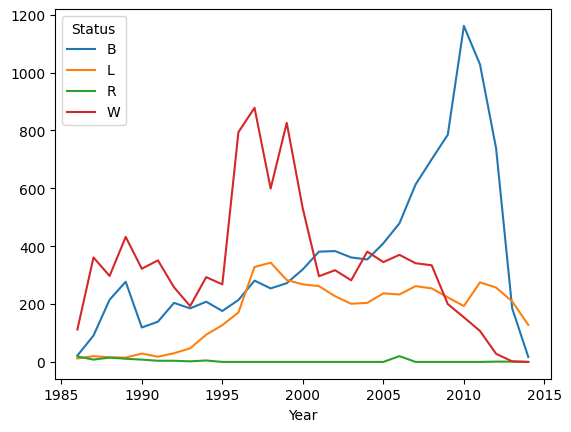

In [ ]:
%matplotlib inline
by_year.plot()

---

<Axes: title={'center': 'Condemnations by Status Over Time'}, xlabel='Year', ylabel='Number of Condemnations'>

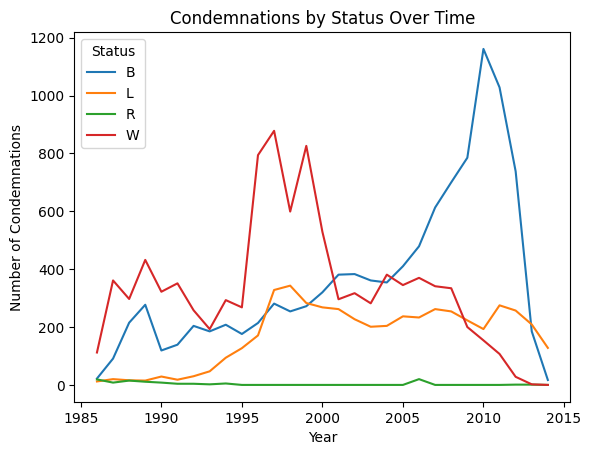

In [ ]:
# Plot the by_year DataFrame
%matplotlib inline
by_year.plot(title="Condemnations by Status Over Time", xlabel="Year", ylabel="Number of Condemnations")


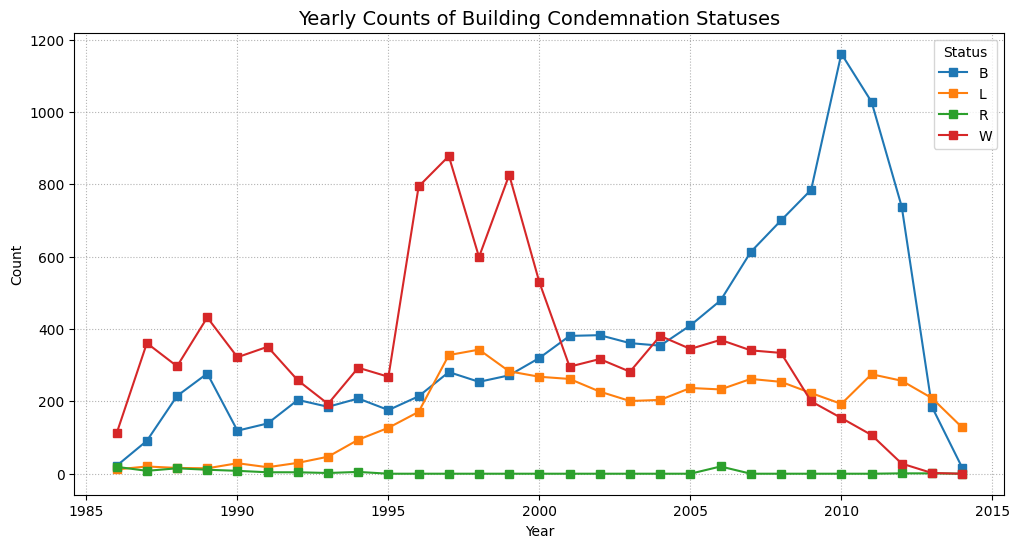

In [ ]:
import matplotlib.pyplot as plt
# Plotting with marker style and colors
ax = by_year.plot(figsize=(12, 6), marker='s', linestyle='-', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adding labels
ax.set_title("Yearly Counts of Building Condemnation Statuses", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Count")

# Customising for clarity
ax.legend(title="Status", loc="best")
ax.grid(visible=True, linestyle=':', color='gray', alpha=0.6)


plt.show()


The annual counts for the various construction condemnation status (B, L, R, and W) from 1986 to 2014 are displayed in this chart:

After 2000, Status B (blue) increased sharply, peaked around 2010, and then sharply declined. This would suggest that there were more condemnations or higher requirements in place at the time.
The 1990s had a high for Status W (red), but after 2000, it fell, indicating a move out of this classification.
Consistent condemnation levels are indicated by the gradual increase in Status L (orange).
Throughout, Status R (green) stays low and steady, suggesting that it is an uncommon kind of condemnation.



# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [ ]:
import pandas as pd
meetings = pd.read_csv('/content/meetings.csv')


In [ ]:

# Creating startDate column
meetings['startDate'] = meetings['startTime'].str[0:10]

# Converting startDate to datetime
meetings['startDate'] = pd.to_datetime(meetings['startDate'])

# Defining Period column
before_filter = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')
during_filter = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')
meetings.loc[before_filter, 'Period'] = 'BEFORE'
meetings.loc[during_filter, 'Period'] = 'DURING'

# Filtering  "BEFORE" and "DURING" periods
meetings = meetings[meetings['Period'].isin(['BEFORE', 'DURING'])]

# Creating  pivot table
summary = pd.pivot_table(
    meetings,
    values='startTime',
    index='userName',
    columns='Period',
    aggfunc='count',
    fill_value=0
).rename(columns={'BEFORE': 'Before', 'DURING': 'During'})

In [ ]:
# Calculating percent change
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before']).replace([float('inf'), -float('inf')], 0).fillna(0)

# Display summary
summary.head()

Period,Before,During,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000


---

In [ ]:
assert(len(summary) == 22)

In [ ]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
